In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read in the original FBI hate crime statistical dataset

In [2]:
df = pd.read_csv("hate_crime.csv")

In [3]:
df

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,NaN,County,AR,Arkansas,West South Central,South,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226323,1445214,2021,WY0150100,Cody,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Simple Assault,1.0,Residence/Home,Anti-Lesbian (Female),Individual,S,S
226324,1445630,2021,WY0070200,Riverton,NaN,City,WY,Wyoming,Mountain,West,...,Not Specified,Not Specified,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
226325,1448544,2021,WY0190100,Green River,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Government/Public Building,Anti-American Indian or Alaska Native,Individual,S,S
226326,1448545,2021,WY0150000,Park,NaN,County,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Mental Disability,Individual,S,S


In [4]:
df.keys()

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias'],
      dtype='object')

### Filter only 2020 racial hate crimes, drop irrelavant features, reorganize the feature order, and set incident date as index column

In [5]:
df = df.loc[df['data_year'] == 2020]
df

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
209171,864279,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,2,Arson;Burglary/Breaking & Entering,NaN,Church/Synagogue/Temple/Mosque,Anti-Other Christian,Religious Organization,M,S
209172,893434,2020,AK0010200,Fairbanks,NaN,City,AK,Alaska,Pacific,West,...,White,Not Hispanic or Latino,1,Aggravated Assault,1.0,Government/Public Building,Anti-Transgender,Individual,S,S
209173,1052479,2020,AK0010300,Juneau,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,Anti-American Indian or Alaska Native,Individual,S,S
209174,1054279,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,1,Sexual Assault With An Object,1.0,Park/Playground,Anti-Female,Individual,S,S
209175,1054280,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,American Indian or Alaska Native,Not Hispanic or Latino,1,Aggravated Assault,1.0,Hotel/Motel/Etc.,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219020,1440762,2020,WY0170000,Sheridan,NaN,County,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Simple Assault,1.0,Jail/Prison/Penitentiary/Corrections Facility,Anti-Native Hawaiian or Other Pacific Islander,Individual,S,S
219021,1441769,2020,WY0170100,Sheridan,NaN,City,WY,Wyoming,Mountain,West,...,Not Specified,Not Specified,1,Simple Assault,1.0,Bar/Nightclub,Anti-American Indian or Alaska Native,Individual,S,S
219022,1442136,2020,WY0150100,Cody,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Simple Assault,1.0,Residence/Home,Anti-Female,Individual,S,S
219023,1444656,2020,WY0210100,Evanston,NaN,City,WY,Wyoming,Mountain,West,...,Black or African American,Not Hispanic or Latino,1,Aggravated Assault,1.0,Residence/Home,Anti-White,Individual,S,S


In [6]:
# Change the type of incident_date from string to datetime
df['incident_date'] = pd.to_datetime(df['incident_date'])

/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_45760/3441731086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['incident_date'] = pd.to_datetime(df['incident_date'])


In [7]:
# Observe the content of each hate crime incident, what features and information are documented?
df.iloc[0]

incident_id                                                 864279
data_year                                                     2020
ori                                                      AK0010100
pug_agency_name                                          Anchorage
pub_agency_unit                                                NaN
agency_type_name                                              City
state_abbr                                                      AK
state_name                                                  Alaska
division_name                                              Pacific
region_name                                                   West
population_group_code                                           1C
population_group_description      Cities from 250,000 thru 499,999
incident_date                                  2020-01-24 00:00:00
adult_victim_count                                             NaN
juvenile_victim_count                                         

Drop, reorganize, and reset index column for the DataFrame

In [8]:
df = df.drop(['ori', 'pug_agency_name', 'pub_agency_unit', 'agency_type_name', 'state_abbr', 'population_group_code',
              'adult_victim_count', 'juvenile_victim_count', 'adult_offender_count', 'juvenile_offender_count'], axis=1)

In [9]:
df.iloc[0]

incident_id                                                 864279
data_year                                                     2020
state_name                                                  Alaska
division_name                                              Pacific
region_name                                                   West
population_group_description      Cities from 250,000 thru 499,999
incident_date                                  2020-01-24 00:00:00
total_offender_count                                             0
offender_race                                              Unknown
offender_ethnicity                                         Unknown
victim_count                                                     2
offense_name                    Arson;Burglary/Breaking & Entering
total_individual_victims                                       NaN
location_name                       Church/Synagogue/Temple/Mosque
bias_desc                                     Anti-Other Chris

In [10]:
df = df.reindex(columns=['incident_id', 'incident_date', 'bias_desc', 'offense_name', 
                         'offender_race', 'offender_ethnicity', 'total_offender_count', 'victim_count',
                         'location_name', 'data_year', 'division_name', 'region_name', 'population_group_description', 
                         'total_individual_victims', 'victim_types', 'multiple_offense', 'multiple_bias'])
df

,incident_id,incident_date,bias_desc,offense_name,offender_race,offender_ethnicity,total_offender_count,victim_count,location_name,data_year,division_name,region_name,population_group_description,total_individual_victims,victim_types,multiple_offense,multiple_bias
209171,864279,2020-01-24,Anti-Other Christian,Arson;Burglary/Breaking & Entering,Unknown,Unknown,0,2,Church/Synagogue/Temple/Mosque,2020,Pacific,West,"Cities from 250,000 thru 499,999",NaN,Religious Organization,M,S
209172,893434,2020-01-03,Anti-Transgender,Aggravated Assault,White,Not Hispanic or Latino,1,1,Government/Public Building,2020,Pacific,West,"Cities from 25,000 thru 49,999",1.0,Individual,S,S
209173,1052479,2020-05-04,Anti-American Indian or Alaska Native,Aggravated Assault,Unknown,Unknown,0,1,Parking/Drop Lot/Garage,2020,Pacific,West,"Cities from 25,000 thru 49,999",1.0,Individual,S,S
209174,1054279,2020-06-01,Anti-Female,Sexual Assault With An Object,Unknown,Unknown,1,1,Park/Playground,2020,Pacific,West,"Cities from 250,000 thru 499,999",1.0,Individual,S,S
209175,1054280,2020-06-21,Anti-Black or African American,Aggravated Assault,American Indian or Alaska Native,Not Hispanic or Latino,1,1,Hotel/Motel/Etc.,2020,Pacific,West,"Cities from 250,000 thru 499,999",1.0,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219020,1440762,2020-12-05,Anti-Native Hawaiian or Other Pacific Islander,Simple Assault,White,Not Hispanic or Latino,1,1,Jail/Prison/Penitentiary/Corrections Facility,2020,Mountain,West,"Non-MSA counties from 10,000 thru 24,999",1.0,Individual,S,S
219021,1441769,2020-11-07,Anti-American Indian or Alaska Native,Simple Assault,Not Specified,Not Specified,0,1,Bar/Nightclub,2020,Mountain,West,"Cities from 10,000 thru 24,999",1.0,Individual,S,S
219022,1442136,2020-05-10,Anti-Female,Simple Assault,White,Not Hispanic or Latino,1,1,Residence/Home,2020,Mountain,West,"Cities from 2,500 thru 9,999",1.0,Individual,S,S
219023,1444656,2020-10-16,Anti-White,Aggravated Assault,Black or African American,Not Hispanic or Latino,1,1,Residence/Home,2020,Mountain,West,"Cities from 10,000 thru 24,999",1.0,Individual,S,S


In [11]:
# Set incident date as index column for time series analysis and sort the date
df = df.set_index('incident_date')
df = df.sort_index()
df

,incident_id,bias_desc,offense_name,offender_race,offender_ethnicity,total_offender_count,victim_count,location_name,data_year,division_name,region_name,population_group_description,total_individual_victims,victim_types,multiple_offense,multiple_bias
incident_date,,,,,,,,,,,,,,,,
2020-01-01,1262512,Anti-Black or African American,Destruction/Damage/Vandalism of Property,Unknown,Unknown,0,1,Restaurant,2020,Pacific,West,"Cities from 25,000 thru 49,999",NaN,Business,S,S
2020-01-01,1438745,Anti-Gay (Male),Intimidation,Black or African American,Not Hispanic or Latino,1,1,Other/Unknown,2020,South Atlantic,South,"Cities from 250,000 thru 499,999",1.0,Individual,S,S
2020-01-01,1346275,Anti-Black or African American,Simple Assault,Unknown,Hispanic or Latino,2,1,Parking/Drop Lot/Garage,2020,Pacific,West,"Cities 1,000,000 or over",1.0,Individual,S,S
2020-01-01,1447667,Anti-Gay (Male),Aggravated Assault,Unknown,Unknown,1,1,Residence/Home,2020,West South Central,South,"Cities from 25,000 thru 49,999",1.0,Individual,S,S
2020-01-01,1437121,Anti-Hindu,Destruction/Damage/Vandalism of Property,Not Specified,Not Specified,0,1,Other/Unknown,2020,Pacific,West,"Cities from 100,000 thru 249,999",1.0,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,1401872,Anti-Physical Disability,All Other Larceny,Unknown,Unknown,2,1,Specialty Store,2020,West South Central,South,"Cities from 50,000 thru 99,999",1.0,Individual,S,S
2020-12-31,1447103,Anti-Black or African American,Aggravated Assault,Not Specified,Not Specified,0,3,Residence/Home,2020,South Atlantic,South,"MSA counties from 25,000 thru 99,999",3.0,Individual,S,S
2020-12-31,1442167,Anti-Catholic,Destruction/Damage/Vandalism of Property,Unknown,Unknown,1,1,Department/Discount Store,2020,Mountain,West,"Cities from 250,000 thru 499,999",0.0,Business,S,S


In [12]:
df_asian = df[df['bias_desc'].str.contains('Asian')]
df_asian

,incident_id,bias_desc,offense_name,offender_race,offender_ethnicity,total_offender_count,victim_count,location_name,data_year,division_name,region_name,population_group_description,total_individual_victims,victim_types,multiple_offense,multiple_bias
incident_date,,,,,,,,,,,,,,,,
2020-01-01,1438195,Anti-Asian,Destruction/Damage/Vandalism of Property;Intim...,White,Not Hispanic or Latino,1,2,Convenience Store,2020,Mountain,West,"Cities under 2,500",1.0,Individual,M,S
2020-01-03,1438405,Anti-Asian,Destruction/Damage/Vandalism of Property,Not Specified,Not Specified,0,2,Convenience Store,2020,Pacific,West,"Cities from 500,000 thru 999,999",1.0,Business;Individual,S,S
2020-01-09,1436600,Anti-Asian,Intimidation,White,Not Hispanic or Latino,1,1,Industrial Site,2020,East South Central,South,"Cities from 25,000 thru 49,999",1.0,Individual,S,S
2020-01-11,1327148,Anti-Asian,Simple Assault,White,Unknown,1,1,Highway/Road/Alley/Street/Sidewalk,2020,South Atlantic,South,"Cities from 500,000 thru 999,999",1.0,Individual,S,S
2020-01-11,1442668,Anti-Asian,Intimidation,Black or African American,Not Hispanic or Latino,1,1,Residence/Home,2020,West South Central,South,"MSA counties 100,000 or over",1.0,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-19,1441462,Anti-Asian,Simple Assault,Unknown,Unknown,1,1,Convenience Store,2020,Pacific,West,"Cities from 100,000 thru 249,999",1.0,Individual,S,S
2020-12-23,1346443,Anti-Asian,Robbery,Unknown,Hispanic or Latino,3,2,Highway/Road/Alley/Street/Sidewalk,2020,Pacific,West,"Cities from 50,000 thru 99,999",2.0,Individual,S,S
2020-12-24,1262483,Anti-Asian,Simple Assault,White,Hispanic or Latino,1,1,Highway/Road/Alley/Street/Sidewalk,2020,Pacific,West,"Cities from 25,000 thru 49,999",1.0,Individual,S,S


### Calculate the trend of all racial hate crimes

In [13]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
def monthly_count(df):
    ''' 
    Helper function to calculate a given DataFrame's monthly hate crime counts
    '''
    jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    for index, _ in df.iterrows():
        num = index.month
        if num == 1:
            jan +=1
        elif num == 2:
            feb += 1
        elif num == 3:
            mar += 1
        elif num == 4:
            apr += 1
        elif num == 5:
            may += 1
        elif num == 6:
            jun += 1
        elif num == 7:
            jul += 1
        elif num == 8:
            aug += 1
        elif num == 9:
            sep += 1
        elif num == 10:
            oct += 1
        elif num == 11:
            nov += 1
        else:
            dec += 1  
    return jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec

In [18]:
# Monthly incidents including all racial hate crimes
jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec = monthly_count(df)
total = jan+feb+mar+apr+may+jun+jul+aug+sep+oct+nov+dec
print("Total number of all hate crimes = ", total)

Total number of all hate crimes =  9854


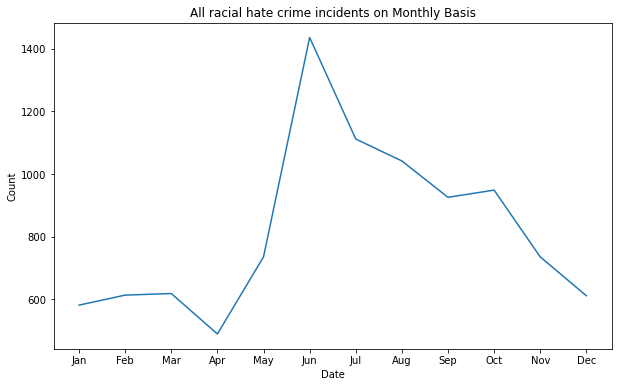

In [19]:
plt.figure(figsize=(10, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
crime_num = [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]

plt.plot(months, crime_num)
plt.title("All racial hate crime incidents on Monthly Basis")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

In [20]:
# Monthly incidents of anti-Asian hate crimes
jan_a, feb_a, mar_a, apr_a, may_a, jun_a, jul_a, aug_a, sep_a, oct_a, nov_a, dec_a = monthly_count(df_asian)
total_a = jan_a+feb_a+mar_a+apr_a+may_a+jun_a+jul_a+aug_a+sep_a+oct_a+nov_a+dec_a
print("Total number of anti-Asian hate crimes = ", total_a)

Total number of anti-Asian hate crimes =  356


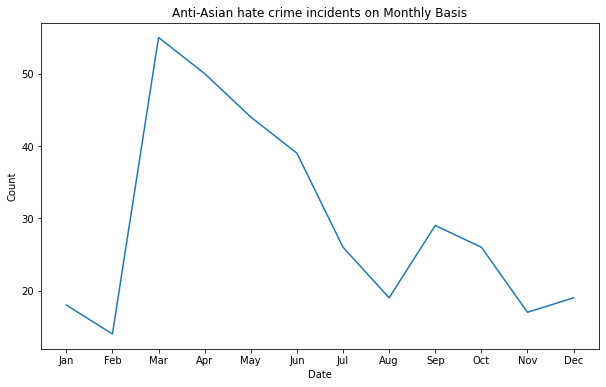

In [21]:
plt.figure(figsize=(10, 6))
crime_num_a = [jan_a, feb_a, mar_a, apr_a, may_a, jun_a, jul_a, aug_a, sep_a, oct_a, nov_a, dec_a]

plt.plot(months, crime_num_a)
plt.title("Anti-Asian hate crime incidents on Monthly Basis")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

Why the decrease in anti-Asian hate crimes after April -- possibly not labeling anti-asian -- interference in the police side as the high number is consistent in social media hate sentiment

Or because of quanranteen and people simply cannot go out and commit hate crimes; or possibly because people are under quanranteen they are stuck in their house and take it out on the internet

The crime increase on August -- because quaranteen over?

Stop Asian Hate movement? What time period

The initial hate crime might trigger the following explosive increase of hate crimes as the former normalize the latter

What happened in December? Sudden increase in Twitter data

Also refer back to general hate crime data, also share a similar trend 

Consider check anti-other-country

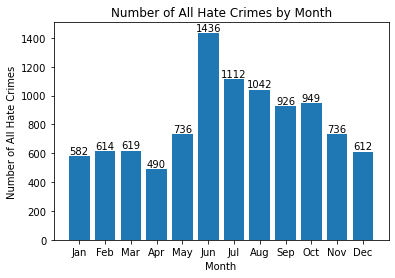

In [22]:
plt.bar(months, crime_num)

plt.title('Number of All Hate Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of All Hate Crimes')

for i in range(len(crime_num)):
    plt.text(i, crime_num[i], crime_num[i], ha='center', va='bottom')

plt.show()

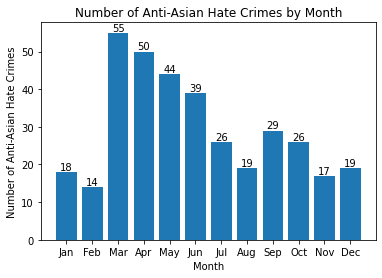

In [23]:
plt.bar(months, crime_num_a)

plt.title('Number of Anti-Asian Hate Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Anti-Asian Hate Crimes')

for i in range(len(crime_num_a)):
    plt.text(i, crime_num_a[i], crime_num_a[i], ha='center', va='bottom')

plt.show()

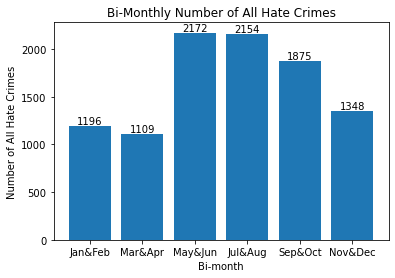

In [24]:
crime_num2 = [jan+feb, mar+apr, may+jun, jul+aug, sep+oct, nov+dec]
bimonths = ['Jan&Feb', 'Mar&Apr', 'May&Jun', 'Jul&Aug', 'Sep&Oct', 'Nov&Dec']
plt.bar(bimonths, crime_num2)

plt.title('Bi-Monthly Number of All Hate Crimes')
plt.xlabel('Bi-month')
plt.ylabel('Number of All Hate Crimes')

for i in range(len(crime_num2)):
    plt.text(i, crime_num2[i], crime_num2[i], ha='center', va='bottom')

plt.show()

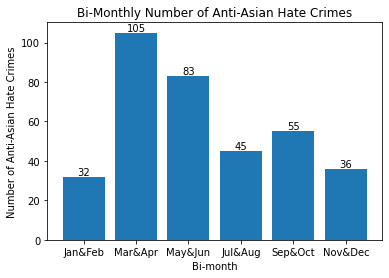

In [25]:
crime_num_a_2 = [jan_a+feb_a, mar_a+apr_a, may_a+jun_a, jul_a+aug_a, sep_a+oct_a, nov_a+dec_a]
plt.bar(bimonths, crime_num_a_2)

plt.title('Bi-Monthly Number of Anti-Asian Hate Crimes')
plt.xlabel('Bi-month')
plt.ylabel('Number of Anti-Asian Hate Crimes')

for i in range(len(crime_num_a_2)):
    plt.text(i, crime_num_a_2[i], crime_num_a_2[i], ha='center', va='bottom')

plt.show()

### Calculate basic summary statistics


In [26]:
monthly_mean = np.mean(crime_num)
monthly_median = np.median(crime_num)
monthly_mode = pd.Series(crime_num).mode()[0]
monthly_std_dev = np.std(crime_num)
monthly_range_min = np.min(crime_num)
monthly_range_max = np.max(crime_num)

print("All Racial Hate Crime Monthly Mean:", monthly_mean)
print("All Racial Hate Crime Monthly Median:", monthly_median)
print("All Racial Hate Crime Monthly Mode:", monthly_mode)
print("All Racial Hate Crime Monthly Standard Deviation:", monthly_std_dev)
print("All Racial Hate Crime Monthly Range (min, max):", (monthly_range_min, monthly_range_max))

All Racial Hate Crime Monthly Mean: 821.1666666666666
All Racial Hate Crime Monthly Median: 736.0
All Racial Hate Crime Monthly Mode: 736
All Racial Hate Crime Monthly Standard Deviation: 265.7727203625099
All Racial Hate Crime Monthly Range (min, max): (490, 1436)


In [28]:
monthly_mean_a = np.mean(crime_num_a)
monthly_median_a = np.median(crime_num_a)
monthly_mode_a = pd.Series(crime_num_a).mode()[0]
monthly_std_dev_a = np.std(crime_num_a)
monthly_range_min_a = np.min(crime_num_a)
monthly_range_max_a = np.max(crime_num_a)

print("Anti-Asian Racial Hate Crime Monthly Mean:", monthly_mean_a)
print("Anti-Asian Racial Hate Crime Monthly Median:", monthly_median_a)
print("Anti-Asian Racial Hate Crime Monthly Mode:", monthly_mode_a)
print("Anti-Asian Racial Hate Crime Monthly Standard Deviation:", monthly_std_dev_a)
print("Anti-Asian Racial Hate Crime Monthly Range (min, max):", (monthly_range_min_a, monthly_range_max_a))

Anti-Asian Racial Hate Crime Monthly Mean: 29.666666666666668
Anti-Asian Racial Hate Crime Monthly Median: 26.0
Anti-Asian Racial Hate Crime Monthly Mode: 19
Anti-Asian Racial Hate Crime Monthly Standard Deviation: 13.368703086770317
Anti-Asian Racial Hate Crime Monthly Range (min, max): (14, 55)


In [21]:
df_monthly = df.resample('M').sum()
rolling_avg = df_monthly.rolling(window=3).mean()
print(rolling_avg)


                incident_id      data_year  adult_victim_count  \
incident_date                                                    
2020-01-31              NaN            NaN                 NaN   
2020-02-29              NaN            NaN                 NaN   
2020-03-31     3.411767e+07   58580.000000           25.333333   
2020-04-30     4.618191e+07   80126.666667           37.333333   
2020-05-31     5.914550e+07  100326.666667           47.333333   
2020-06-30     5.372710e+07   89553.333333           43.000000   
2020-07-31     4.547663e+07   73393.333333           34.333333   
2020-08-31     3.513431e+07   56560.000000           27.666667   
2020-09-30     3.192197e+07   49826.666667           26.666667   
2020-10-31     3.251004e+07   49826.666667           26.000000   
2020-11-30     3.225127e+07   48480.000000           29.000000   
2020-12-31     2.778926e+07   41746.666667           22.666667   

               juvenile_victim_count  total_offender_count  \
incident_date

### Conduct some basic time series analysis

<b>Rolling mean:</b> aka moving average, a method of smoothing out fluctuations in a time series by calculating the average of a sliding window of observations over time. By taking the mean of a window of observations, it can help to reduce the effect of random noise and highlight underlying trends or changes in the data. Rolling means are useful for identifying short-term changes in the data

<b>Trend analysis:</b> a method of decomposing a time series into its underlying trend, cycle, and random components. It aims to identify the long-term direction or tendency of the data, ignoring the short-term fluctuations and noise.


In [22]:
import statsmodels.api as sm

# Convert the list to a Pandas DataFrame with a DatetimeIndex
dates = pd.date_range(start='2020-01-01', end='2020-12-01', freq='MS')
df = pd.DataFrame({'hate_crimes': crime_num}, index=dates)

# Calculate a rolling mean with a window size of 3
rolling_mean = df['hate_crimes'].rolling(window=3).mean()

# Perform a trend analysis using a Hodrick-Prescott filter
cycle, trend = sm.tsa.filters.hpfilter(df['hate_crimes'], lamb=1600)

print("Rolling Mean:\n", rolling_mean)
print("\nTrend Analysis:\n", trend)

Rolling Mean:
 2020-01-01          NaN
2020-02-01          NaN
2020-03-01    29.000000
2020-04-01    39.666667
2020-05-01    49.666667
2020-06-01    44.333333
2020-07-01    36.333333
2020-08-01    28.000000
2020-09-01    24.666667
2020-10-01    24.666667
2020-11-01    24.000000
2020-12-01    20.666667
Freq: MS, Name: hate_crimes, dtype: float64

Trend Analysis:
 2020-01-01    36.246475
2020-02-01    35.155348
2020-03-01    34.052817
2020-04-01    32.914256
2020-05-01    31.728130
2020-06-01    30.493585
2020-07-01    29.217434
2020-08-01    27.911808
2020-09-01    26.586828
2020-10-01    25.247043
2020-11-01    23.898512
2020-12-01    22.547764
Freq: MS, Name: hate_crimes_trend, dtype: float64


<i><b>Rolling Means:</b></i>

From the rolling means, we can see that the average number of hate crimes per month increased from March to May (29 to 49.67), indicating a potential spike in hate crimes during that period. However, the rolling mean decreased from May to June (49.67 to 44.33), suggesting that the number of hate crimes may have decreased in June. The rolling mean then decreased further from June to July (44.33 to 36.33) and continued to decrease gradually until December (20.67), indicating a general downward trend in the number of hate crimes.

<i><b>Trend Analysis:</b></i>

The trend analysis shows that the number of hate crimes per month decreased from January (36.25) to December (22.55), suggesting a general downward trend in the number of hate crimes throughout the year. The negative trend value (-1.69) indicates that the time series data is decreasing over time.

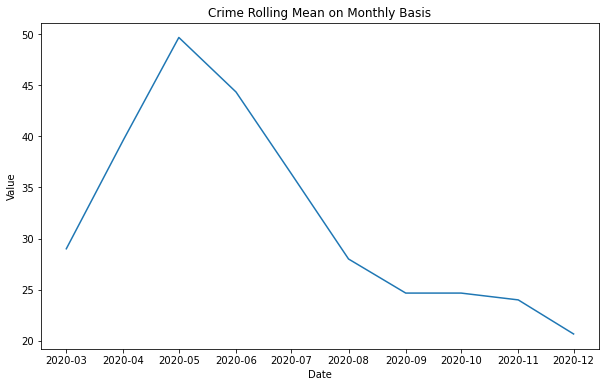

In [23]:
plt.figure(figsize=(10, 6))

plt.plot(rolling_mean.index, rolling_mean.values)
plt.title("Crime Rolling Mean on Monthly Basis")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

In [ ]:
df